In [56]:
import requests
import pandas as pd
import numpy as np
import http.client
import json
from scipy.cluster.vq import whiten, kmeans2
import matplotlib.pyplot as plt

%matplotlib inline

Используя kmeans сделать кластеризацию футбольных команд по голам дома и в гостях, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров

In [65]:
def get_api(url, result_key):
    json = {}
    try:
        json = requests.get(url, headers = {'X-Auth-Token': 'bdb816e3b91a4763aafd0fc1d0485d65'}).json()
        return json[result_key]
    except:
        print(json)
        return None

In [95]:
teams = get_api('http://api.football-data.org/v1/soccerseasons/439/teams', 'teams')
#teams

In [114]:
for team in teams:
    name = get_api(team['_links']['self']['href'], 'name')
    fixtures = get_api(team['_links']['fixtures']['href'], 'fixtures')
    home_goals = 0
    away_goals = 0
    for i in fixtures:
        if i['status'] != 'FINISHED':
            continue
        if team['name'] == i['awayTeamName']:
            away_goals += i['result']['goalsAwayTeam']
        else:
            home_goals += i['result']['goalsHomeTeam']
    print('team: {}, home_goals: {}, away_goals: {}'.format(name, home_goals, away_goals))
    team['away_goals'] = away_goals
    team['home_goals'] = home_goals

team: FC Rio Ave, home_goals: 7, away_goals: 2
team: FC Porto, home_goals: 16, away_goals: 7
team: Moreirense FC, home_goals: 1, away_goals: 5
team: FC Paços de Ferreira, home_goals: 6, away_goals: 3
team: Sporting CP, home_goals: 5, away_goals: 14
team: Maritimo Funchal, home_goals: 6, away_goals: 3
team: CD Tondela, home_goals: 5, away_goals: 5
team: SL Benfica, home_goals: 13, away_goals: 4
team: Boavista Porto FC, home_goals: 5, away_goals: 2
team: FC Arouca, home_goals: 0, away_goals: 0
team: Vitoria Setubal, home_goals: 5, away_goals: 2
team: C.F. Os Belenenses, home_goals: 5, away_goals: 5
team: Vitoria Guimaraes, home_goals: 6, away_goals: 1
team: Sporting Braga, home_goals: 10, away_goals: 5
team: GD Estoril Praia, home_goals: 3, away_goals: 5
team: Feirense, home_goals: 6, away_goals: 3
team: Nacional Funchal, home_goals: 0, away_goals: 0
team: G.D. Chaves, home_goals: 4, away_goals: 5


In [116]:
data = []
for team in teams:
    if team['home_goals']:
        data.append({'name': team['name'], 'home_goals': team['home_goals'], 'away_goals': team['away_goals']})
data

[{'away_goals': 2, 'home_goals': 7, 'name': 'FC Rio Ave'},
 {'away_goals': 7, 'home_goals': 16, 'name': 'FC Porto'},
 {'away_goals': 5, 'home_goals': 1, 'name': 'Moreirense FC'},
 {'away_goals': 3, 'home_goals': 6, 'name': 'FC Paços de Ferreira'},
 {'away_goals': 14, 'home_goals': 5, 'name': 'Sporting CP'},
 {'away_goals': 3, 'home_goals': 6, 'name': 'Maritimo Funchal'},
 {'away_goals': 5, 'home_goals': 5, 'name': 'CD Tondela'},
 {'away_goals': 4, 'home_goals': 13, 'name': 'SL Benfica'},
 {'away_goals': 2, 'home_goals': 5, 'name': 'Boavista Porto FC'},
 {'away_goals': 2, 'home_goals': 5, 'name': 'Vitoria Setubal'},
 {'away_goals': 5, 'home_goals': 5, 'name': 'C.F. Os Belenenses'},
 {'away_goals': 1, 'home_goals': 6, 'name': 'Vitoria Guimaraes'},
 {'away_goals': 5, 'home_goals': 10, 'name': 'Sporting Braga'},
 {'away_goals': 5, 'home_goals': 3, 'name': 'GD Estoril Praia'},
 {'away_goals': 3, 'home_goals': 6, 'name': 'Feirense'},
 {'away_goals': 5, 'home_goals': 4, 'name': 'G.D. Chaves'}

In [118]:
data_pd = pd.DataFrame(data)
data_pd

,away_goals,home_goals,name
0,2,7,FC Rio Ave
1,7,16,FC Porto
2,5,1,Moreirense FC
3,3,6,FC Paços de Ferreira
4,14,5,Sporting CP
5,3,6,Maritimo Funchal
6,5,5,CD Tondela
7,4,13,SL Benfica
8,2,5,Boavista Porto FC
9,2,5,Vitoria Setubal


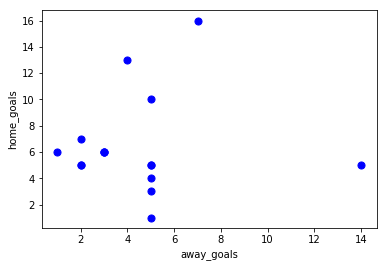

In [120]:
data_pd.plot.scatter(x='away_goals', y='home_goals', c='b', s=50)

In [121]:
del data_pd['name']
data_pd

,away_goals,home_goals
0,2,7
1,7,16
2,5,1
3,3,6
4,14,5
5,3,6
6,5,5
7,4,13
8,2,5
9,2,5


In [123]:
data_matrix = whiten(data_pd.as_matrix())
data_matrix

array([[ 0.68615202,  1.95114845],
       [ 2.40153208,  4.45976789],
       [ 1.71538006,  0.27873549],
       [ 1.02922803,  1.67241296],
       [ 4.80306416,  1.39367746],
       [ 1.02922803,  1.67241296],
       [ 1.71538006,  1.39367746],
       [ 1.37230404,  3.62356141],
       [ 0.68615202,  1.39367746],
       [ 0.68615202,  1.39367746],
       [ 1.71538006,  1.39367746],
       [ 0.34307601,  1.67241296],
       [ 1.71538006,  2.78735493],
       [ 1.71538006,  0.83620648],
       [ 1.02922803,  1.67241296],
       [ 1.71538006,  1.11494197]])

In [124]:
centroids, cluster_map = kmeans2(data_matrix, 3)
centroids, cluster_map

(array([[ 1.71538006,  2.78735493],
        [ 1.45147543,  1.37223627],
        [ 1.88691806,  4.04166465]]),
 array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int32))

In [126]:
colors_map = {0: 'c', 1: 'pink', 2: 'g', 3: 'b', 4: 'r'}
colors = [colors_map[c] for c in cluster_map]
colors

['pink',
 'g',
 'pink',
 'pink',
 'pink',
 'pink',
 'pink',
 'g',
 'pink',
 'pink',
 'pink',
 'pink',
 'c',
 'pink',
 'pink',
 'pink']

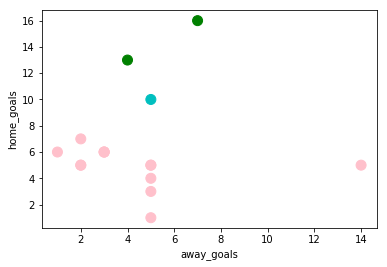

In [128]:
data_pd.plot.scatter(x='away_goals', y='home_goals', c=colors, s=100) #как-то не особо отличается по рисунку) попробуем 5!

In [129]:
centroids, cluster_map = kmeans2(data_matrix, 5)
centroids, cluster_map

/Users/staroverova/anaconda/lib/python3.6/site-packages/scipy/cluster/vq.py:653: UserWarning: One of the clusters is empty. Re-run kmean with a different initialization.
  warnings.warn("One of the clusters is empty. "


(array([[ 0.34307601,  1.67241296],
        [ 4.80306416,  1.39367746],
        [ 0.85769003,  1.62595704],
        [ 1.82973873,  3.62356141],
        [ 1.71538006,  1.00344777]]),
 array([2, 3, 4, 2, 1, 2, 4, 3, 2, 2, 4, 0, 3, 4, 2, 4], dtype=int32))

In [130]:
colors_map = {0: 'c', 1: 'pink', 2: 'g', 3: 'b', 4: 'r'}
colors = [colors_map[c] for c in cluster_map]
colors

['g',
 'b',
 'r',
 'g',
 'pink',
 'g',
 'r',
 'b',
 'g',
 'g',
 'r',
 'c',
 'b',
 'r',
 'g',
 'r']

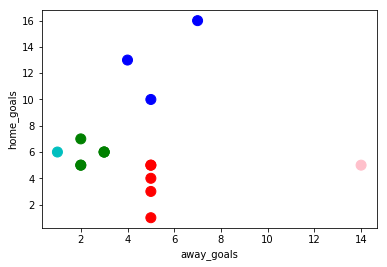

In [131]:
data_pd.plot.scatter(x='away_goals', y='home_goals', c=colors, s=100) #не хватило данных на 5 кластеров)